In [1]:
import os
import pickle
import numpy as np
import PIL.Image
from PIL import Image

import dnnlib
import dnnlib.tflib as tflib
import config
from training import misc

import matplotlib.pyplot as plt

C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorflow\

C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\olivi\Anaconda3\envs\tf1-gpu\lib\site

In [ ]:
from tqdm import tqdm

In [2]:
fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
rnd = np.random.RandomState(0)
num_classes = 4

In [3]:
# Initialize TensorFlow
tflib.init_tf()

# Load pre-trained network
dir = 'results/vm/landscapes/'
#fn = 'network-snapshot-008340.pkl'
#fn = 'network-snapshot-008040.pkl'
#fn = 'network-snapshot-007740.pkl'
#fn = 'network-snapshot-007140.pkl'
#fn = 'network-snapshot-006840.pkl'
#fn = 'network-snapshot-006526.pkl'
fn = 'network-snapshot-006126.pkl'
#fn = 'network-snapshot-005726.pkl'



_G, _D, Gs = pickle.load(open(os.path.join(dir,fn), 'rb'))

# Print network details
Gs.print_layers()

# Initialize conditioning
conditioning = np.eye(num_classes)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Gs                            Params    OutputShape         WeightShape     
---                           ---       ---                 ---             
latents_in                    -         (?, 512)            -               
labels_in                     -         (?, 4)              -               
lod                           -         ()                  -               
dlatent_avg                   -         (512,)              -               
G_mapping/latents_in          -         (?, 512)            -               
G_mapping/labels_in           -         (?, 4)              -               
G_mapping/LabelConcat         2048      (?, 1024)           (4, 512)        
G_mapping/PixelNorm           -         (?, 1024)           -               
G_mapping/Dense0              524800    (?, 512)            (1024, 512)     
G_mapping/Dense1              262656    (?, 512)        

In [ ]:
names = ["Romanticism", "Impressionism", "Realism", "Post-Impressionism"]

In [ ]:
rnd = np.random.RandomState(0)
# Pick latent vector.
latents = rnd.randn(10, Gs.input_shape[1])

for i in range(num_classes):
    # Generate image.
    c = np.tile(conditioning[i],(10,1))
    images = Gs.run(latents, c, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)

    plt.figure(1, figsize=(30,3))
    print(names[i])

    for im  in range(len(images)):
        plt.subplot(1,10,im+1)
        img = PIL.Image.fromarray(images[im], 'RGB')
        plt.imshow(img,interpolation='bicubic')   
        plt.axis('off')
    plt.show()

In [ ]:
def generate_100(style):
    all_latents = []

    for i in tqdm(range(100)):
        # Generate image.
        latents = rnd.randn(1, Gs.input_shape[1])
        all_latents.append(latents[0])
        c = np.tile(conditioning[style],(1,1))
        images = Gs.run(latents, c, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)

        # Save image.
        png_filename = dir + "/"+ names[style]+ '/img_{}.png'.format(i)
        PIL.Image.fromarray(images[0], 'RGB').save(png_filename)
        pickle.dump( all_latents, open(  dir + "/"+ names[style] + "/landscape_latents.p", "wb" ))

In [ ]:
for i in range(len(names)):
    generate_100(i)

In [ ]:
 # Pick latent vector.
all_latents = []

for i in range(100):
    # Generate image.
    latents = rnd.randn(1, Gs.input_shape[1])
    all_latents.append(latents[0])
    c = np.tile(conditioning[1],(1,1))
    images = Gs.run(latents, c, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)

    # Save image.
    png_filename = os.path.join(dir,'images', 'img_{}.png'.format(i))
    PIL.Image.fromarray(images[0], 'RGB').save(png_filename)

In [ ]:
pickle.dump( all_latents, open( "landscape_latents.p", "wb" ) )

In [ ]:
import csv

In [ ]:
with open('latents.tsv', 'w') as fw:
    csv_writer = csv.writer(fw, delimiter='\t')
    csv_writer.writerows(all_latents)

In [ ]:
# Load reals
def load_imgs(style):
    labels_list = pickle.load(open("landscapes/labels.p", "rb"))
    ten_imgs = []
    i = 0
    while len(ten_imgs) < 10:
        if(labels_list[i][1] == style):
            im = PIL.Image.open('landscapes/landscapes/'+labels_list[i][0])
            ten_imgs.append(im)
        i+=1
    return ten_imgs

In [ ]:
for i in range(num_classes):
    images = load_imgs(i)

    plt.figure(1, figsize=(30,3))
    print(names[i])

    for im  in range(len(images)):
        plt.subplot(1,10,im+1)
        plt.imshow(images[im],interpolation='bicubic')   
        plt.axis('off')
    plt.show()

In [5]:
qlatents = rnd.randn(10, Gs.input_shape[1])
random_direction = rnd.randn(16, 512)
new_latent = qlatents[0] + 1 * random_direction


In [6]:
synthesis_kwargs = dict(output_transform=dict(
    func=tflib.convert_images_to_uint8, nchw_to_nhwc=True), minibatch_size=1)

def generate_image(latent_vector):
    latent_vector = latent_vector.reshape((1, latent_vector.shape[0], 512))
    images = Gs.components.synthesis.run(
        latent_vector, randomize_noise=False, **synthesis_kwargs)
    img = PIL.Image.fromarray(images[0], 'RGB')
    return img


def generate_image_from_qlatent(latent_vector):
    dlatents = Gs.components.mapping.run(np.array([latent_vector]), None)
    
    return generate_image(dlatents[0])

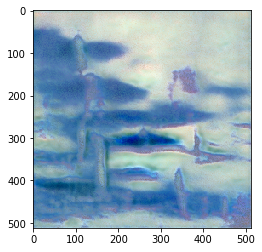

In [8]:
plt.imshow(generate_image_from_qlatent(qlatents[0]))